In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
import sys
import metpy
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import os
import glob

from datetime import datetime
import seaborn as sns
import windrose 
from windrose import WindroseAxes 
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap,ListedColormap

In [3]:
barra_towns = xr.open_dataset("/g/data/q90/ac9768/GBR/barra-2/barra-2_850hPa-winds_towns.nc", engine="h5netcdf",chunks="auto").sel(time=slice('1979-01-01T00:00:00.000000000','2023-05-01T00:00:00.000000000'))
barra_cairns = xr.open_dataset("/g/data/q90/ac9768/GBR/barra-2/barra-2_850hPa-winds_cairns.nc", engine="h5netcdf",chunks="auto").sel(time=slice('1979-01-01T00:00:00.000000000','2023-05-01T00:00:00.000000000'))
barra_willis = xr.open_dataset("/g/data/q90/ac9768/GBR/barra-2/barra-2_850hPa-winds_willis.nc", engine="h5netcdf",chunks="auto").sel(time=slice('1979-01-01T00:00:00.000000000','2023-05-01T00:00:00.000000000'))

barra_sfc_towns = xr.open_dataset("/g/data/q90/ac9768/GBR/barra-2/barra-2_hourly-mean-sfc-winds_towns-radar-site.nc", engine="h5netcdf",chunks="auto").resample(time='1h').mean()
barra_sfc_cairns = xr.open_dataset("/g/data/q90/ac9768/GBR/barra-2/barra-2_hourly-mean-sfc-winds_cairns-radar-site.nc", engine="h5netcdf",chunks="auto").resample(time='1h').mean()
barra_sfc_willis = xr.open_dataset("/g/data/q90/ac9768/GBR/barra-2/barra-2_hourly-mean-sfc-winds_willis-radar-site.nc", engine="h5netcdf",chunks="auto").resample(time='1h').mean()


# Plot wind regime bar charts

In [17]:
import string
def plot_regime_stats(all_values,ax,title,fig,label_start=0,legend: bool=False):
    """_summary_

    Args:
        all_values (_type_): _description_
        ax (_type_): _description_
        title (_type_): _description_
        legend (bool, optional): _description_. Defaults to False.
    """
    # Unpack the directional values
    categories = ["Jan", "Feb", "Mar", "Apr"]
    values1, values2, values3, values4 = zip(*all_values)

    # Plotting
    sns.set_theme(style="dark")
    ax.bar(categories, values1, label='NE', color='seagreen')
    ax.bar(categories, values2, bottom=values1, label='SE', color='royalblue')
    bottom2 = [i + j for i, j in zip(values1, values2)]
    ax.bar(categories, values3, bottom=bottom2, label='SW', color='purple')
    bottom3 = [i + j for i, j in zip(bottom2, values3)]
    ax.bar(categories, values4, bottom=bottom3, label='NW', color='darkorange')
    labels = list(string.ascii_lowercase)
    
    # Add text labels
    for i, (v1, v2, v3, v4) in enumerate(zip(values1, values2, values3, values4)):
        ax.text(i, v1 - v1 / 2 - 2, f'{v1:.1f}', ha='center', va='bottom', color="black", fontsize=12)
        ax.text(i, v1 + v2 / 2, f'{v2:.1f}', ha='center', va='bottom', color="black",fontsize=12)
        ax.text(i, v1 + v2 + v3 / 2 - 2, f'{v3:.1f}', ha='center', va='bottom', color="black",fontsize=12)
        ax.text(i, v1 + v2 + v3 + v4 / 2 - 2, f'{v4:.1f}', ha='center', va='bottom', color="black",fontsize=12)
    subplot_label = labels[label_start+1]
    ax.text(
        0.00, 1.02,
        f'({subplot_label})',
        transform=ax.transAxes,
        fontsize=18,
        va='bottom', ha='left'
    )
    ax.set_ylim(0, 100)
    ax.set_yticklabels([])
    ax.set_ylabel('Frequency (%)')
    ax.set_title(title, pad=15,fontsize=15)
    if legend:
        fig.legend(bbox_to_anchor=(1.2, 1))
    return

In [18]:
def get_data(barra_ds):
    # Group wind directions by month
    ds = barra_ds
    months = ds["wind_dir"].groupby(ds["wind_dir"].time.dt.month)

    # Function to compute directional frequencies
    def wind_counts(winds):
        winds = winds.load()
        total = len(winds)
        bins = [(0, 90), (90, 180), (180, 270), (270, 360)]
        return [(winds[(winds > low ) & (winds <= high )].count() / total * 100)
                for low, high in bins]

    # Process selected months
    selected_months = [1, 2, 3, 4]  
    all_values = [wind_counts(months[m]) for m in selected_months]
    return all_values

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

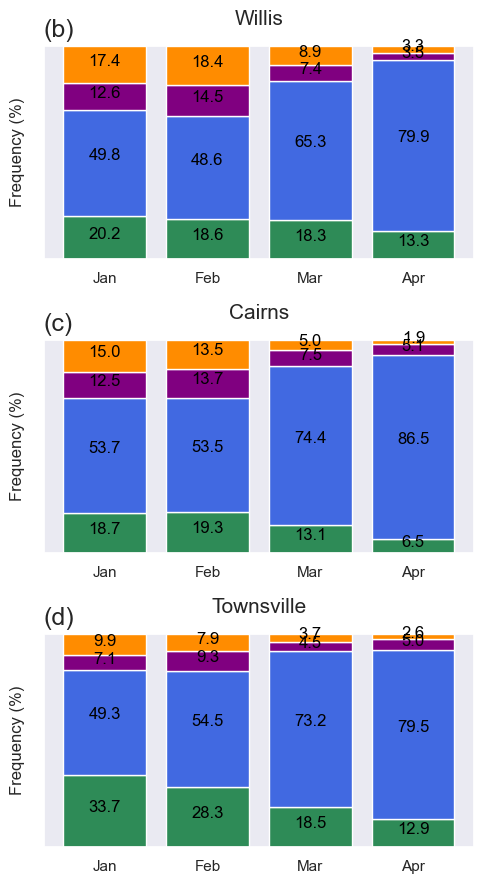

In [19]:
fig, ax = plt.subplots(3,1,figsize=(5,9))

towns = get_data(barra_towns)
cairns = get_data(barra_cairns)
willis = get_data(barra_willis)
plot_regime_stats(willis,ax[0],"Willis",fig,label_start=0)
plot_regime_stats(cairns,ax[1],"Cairns",fig,label_start=1)
plot_regime_stats(towns,ax[2],"Townsville",fig,label_start=2)
plt.tight_layout()
# fig.savefig('/home/563/ac9768/GBR/plots/regime-stats.png', bbox_inches='tight', dpi=400)


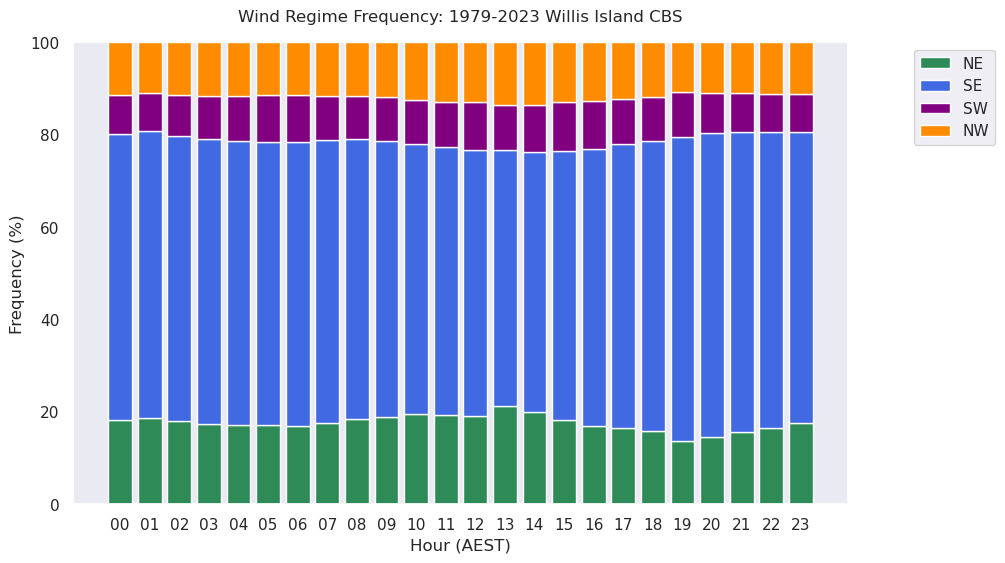

In [81]:
# plot frequency of winds per hour
hours = willis_wind_dir.groupby(willis_wind_dir.time.dt.hour)
def wind_counts(winds):
    ne = (winds[(winds>0*units("degrees"))&(winds<=90*units("degrees"))].count()/len(winds))*100
    se = (winds[(winds>90*units("degrees"))&(winds<=180*units("degrees"))].count()/len(winds))*100
    sw = (winds[(winds>180*units("degrees"))&(winds<=270*units("degrees"))].count()/len(winds))*100
    nw = (winds[(winds>270*units("degrees"))&(winds<=360*units("degrees"))].count()/len(winds))*100
    return ne,se,sw,nw
ne = []
se = []
sw = []
nw = []
for hour in np.arange(0,24,1):
    NE,SE,SW,NW = wind_counts(hours[hour])
    ne.append(NE)
    se.append(SE)
    sw.append(SW)
    nw.append(NW)
categories = ["00","01","02","03","04","05","06","07","08","09","10","11",
              "12","13","14","15","16","17","18","19","20","21","22","23"]

# Create the first bar plot
fig = plt.figure(figsize=(10,6))
fig.tight_layout()
fig.patch.set_facecolor('white')
ax = plt.subplot(1, 1, 1)
sns.set_theme(style="dark")
ax.bar(categories, np.roll(ne,shift=10), label='NE',color='seagreen')
ax.bar(categories, np.roll(se,shift=10), bottom=np.roll(ne,shift=10), label='SE',color='royalblue')
ax.bar(categories, np.roll(sw,shift=10), bottom=[i+j for i, j in zip(np.roll(ne,shift=10), np.roll(se,shift=10))], label='SW',color='purple')
ax.bar(categories, np.roll(nw,shift=10), bottom=[i+j+k for i, j, k in zip(np.roll(ne,shift=10), np.roll(se,shift=10), np.roll(sw,shift=10))], label='NW',color='darkorange')
ax.set_ylim(0, 100)
plt.legend(bbox_to_anchor=(1.2, 1))
ax.set_ylabel('Frequency (%)')
ax.set_xlabel('Hour (AEST)')
ax.set_title('Wind Regime Frequency: 1979-2023 Willis Island CBS',pad=15);